# The Twitter API and Authentication

# Streaming tweets
It's time to stream some tweets! Your task is to create the Streamobject and to filter tweets according to particular keywords. tweepy has been imported for you.

In [6]:
import tweepy

# Store credentials in relevant variables
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"\
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"\
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"\
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"

# Create your Stream object with credentials
stream = tweepy.streaming.StreamListener(consumer_key,consumer_secret,access_token,access_token_secret)

# Filter your Stream variable
stream.filter(track=["clinton", "trump", "sanders", "cruz"])

# Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.\
Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

In [16]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets3.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data =[]

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


# Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [19]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


# A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

In [22]:
# Initialize list to store tweet counts
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])


# Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:\
a list of labels and a list containing the variables you wish to plot (clinton, trump and so on.)\
Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

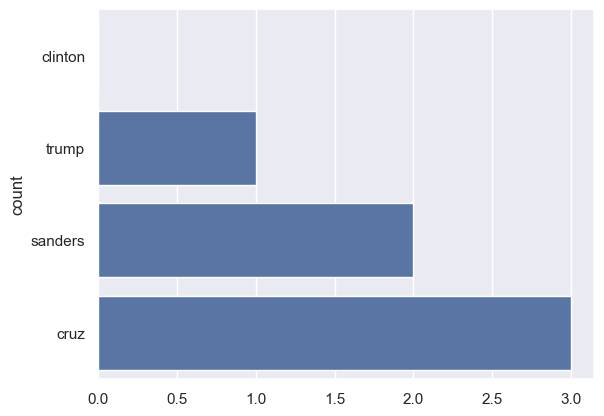

In [33]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd)
ax.set(ylabel="count")
plt.show()